<h1><center>$\text{Problem Set 4: Molecular Clouds and Dark Matter}$</center></h1>





This problem set was developed for the University of Connecticut PHYS4720/6720 Galaxies and the ISM Course taught by Prof. Cara Battersby. The second question is for extra credit and was originally developed by Meg Davis and Dani Lipman. 

---


Instructions:
BEFORE YOU BEGIN:

Navigate to "File" --> "Save a Copy in Drive"
Rename file "LastName_PS4.ipynb" and put it somewhere you can find it again.
Important Note: It is not enough to just rename the filename at the top, please follow the instructions above.

First, please save a copy of this notebook as instructed above.

Complete this notebook on google colab, or download and complete as a jupyter notebook locally.

If you complete this notebook in google colab, then you can turn it in by sharing the final notebook with Prof. Battersby on google (cara.battersby@uconn.edu). If you complete it as a jupyter notebook locally please print the resulting plots, answers, and code, and submit as a PDF file (or put in a google colab file, run all cells and then share with Prof. Battersby).

Question 1 is on the written document, but I give some space and suggested starting points here you can use if you want. Question 2 (goals 1 - 4) are colab only. 

This assignment is due **Wednesday March 29** by class time (12:30 pm). 

**4720: 22 pts total** The written (+coding for plots) portion is 22 points. You can earn up to 5 pts extra credit for Question 2 .

**6720 and Honors: 34 pts total** The written (+coding for plots) portion is 34 points. You can earn up to 5 pts extra credit for Question 2.




---


# Question 0 (brownie points)

**Your Name:** Kelcey Davis

**How long did this assignment take you?:** 1.5 hours

**Who did you work with?:** me

**What resources did you use?:** FILL IN LATER

# Question 1 (22 pts) - all in the written document, but spaces here for your coding work you can use.

Question 1a - written only
Question 1b i and ii - written only

I am replacing this with my cell below.

In [5]:
#Some packages you'll probably want
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from astropy import units as u
#from google.colab import files
plt.style.use('default')

In [6]:
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord, search_around_sky
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
#%matplotlib notebook
%matplotlib inline
from astropy.io import fits
from itertools import combinations
import pickle
from astropy.cosmology import WMAP9 as cosmo
import seaborn as sns
from matplotlib.patches import Rectangle

plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=27)
#plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=27)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams.update({'font.size': 20})

## Problem 1b iii (**3 pts**): 
Plot the rotation velocity of your disk as a function of radius out to 50 kpc. 

In [18]:
hdu = fits.open('/home/kelcey/galaxies_course/Homework4/cool_clouds_short.fits')
hdu[1].data.columns

ColDefs(
    name = 'sigv_kms'; format = 'D'
    name = 'radius_eq_pc'; format = 'D'
    name = 'Mass'; format = 'D'
    name = 'Surf_density_Mpc2'; format = 'D'
    name = 'alpha_vir'; format = 'D'
)

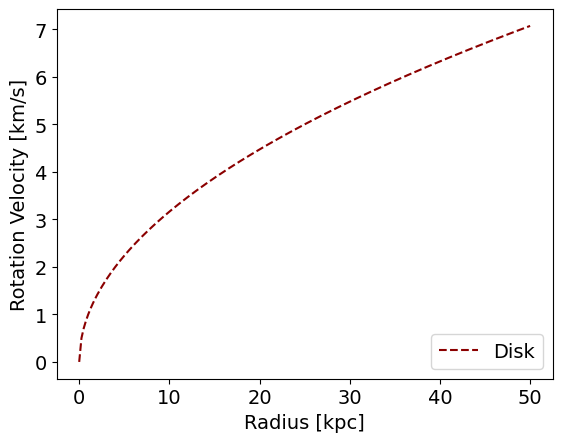

In [4]:
###Pssst! This isn't plotting the right thing. Just giving you an example
# to help you get started. You're welcome.

# plot V(R) vs R from R = 0 to R = 50 kpc
plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots() 

##Example!
R = np.linspace(0, 50, 200)
v = R**0.5

ax.plot(R, v, color='darkred', linestyle='--', label='Disk')

ax.set_xlabel('Radius [kpc]')
ax.set_ylabel(r'Rotation Velocity [km/s]')

#ax.set_ylim(0, 300)

#ax.annotate('ESA-Haystack radio telescope\n from 24 March 2010\n(J. Koppen) ', xy=(1.1, 10), fontsize=8)

ax.legend(loc='lower right');

Problem 1b iv - written only (or coded).



In [ ]:
# Code for 1b iv if you want

Problem 1c i, ii - written only.

## Problem 1c iii (**3 pts**): 

Plot the rotation velocity of your halo as a function of radius out to 50 kpc.

In [ ]:
# Your code

Problem 1d i - written only.

##Problem 1d ii (**2 pts**):

Combine your disk and halo rotation curves in this way to calculate the total rotational velocity, and plot the total versus radius, out to r=50 kpc. Please also overplot the curve for the individual components, in a different color or line style, and be sure to provide a legend to explain the curves.

In [ ]:
# Your code

Problem 1d iii - written only (or can solve numerically, either OK)

Problem 1d iv (1 pt):
Is the galaxy rotation curve ever dominated by the disk component? If so, where? To illustrate your answer, make another plot of the three rotation curves (disk, halo and total), with the x-axis plotted in log.

In [ ]:
# Plot for your code

**Answer:** Your answer


# Extra Credit: Question 2 (up to 5 pts extra credit)

## Introduction

From Paper 3 in Journal Club, we know that understanding molecular clouds is vital to understanding star formation. We also learned just how difficult gaining that understanding has been. [Heyer and Dame 2015](https://ui.adsabs.harvard.edu/abs/2015ARA%26A..53..583H/abstract) walks us through what we know and don't know about the molecular clouds of the interstellar medium (ISM) of our very own galaxy.

**What is the ISM?**

The ISM is the "stuff" between stars. Gas, dust, our beloved molecular clouds. The distribution of this "stuff" in the Milky Way gives us hints about the overall structure of our galaxy, like our spiral arms, bar, and star-forming regions. There is a lot of $H_2$ in the ISM.

**What's so special about CO molecular gas? What about $H_2$?**

 $^{13}$CO and $^{12}$CO are commonly used as a surrogates for H$_2$ gas, which has a dominating presence in our galaxy and a necessary ingredient for star formation. Thing is, H$_2$ radiates inefficiently and can be hard to detect. CO is very easy to detect, even by ground-based telescopes. CO is also really cool- literally. It's properties allow us to probe the coldest regions of gas we can find it in! The data you will use today is from $^{13}$CO gas emission.


**Larson's Law**

Through scaling relationships, we can begin to understand how even the size of these clouds can have major implications for other properties like velocity dispersion ($\sigma_{\nu}$), which tends to be explained by turbulence within the cloud.

[Larson (1981)](http://articles.adsabs.harvard.edu/pdf/1981MNRAS.194..809L) found an scaling relationship to relate the size of a molecular cloud ($R_{MC}$, in our case) to its velocity dispersion ($\sigma_v$). This is called *Larson's Law* (or, at least, one of *Larson's Laws*):


> $\sigma_{\nu} \propto R^n $, $n= 0.38$

Larson's Laws are very commonly talked about in ISM physics. This specific relation shows that the larger the cloud, the more turbulence it experiences.

 [Solomon et al. (1987)](http://articles.adsabs.harvard.edu/pdf/1987ApJ...319..730S) followed up with higher-resolution data and found a slightly larger $n= 0.5$, which is now the more typical value used. Solomon et al. also clearly defined this relationship as:


> $\sigma_{\nu}\approx 0.72 R^{n} $, $n = 0.5$


Solomon's solution for Larson's Law is what we will use, moving foward.

If you're interested, more information can be found in this [Astrobite about Larson's Laws](https://astrobites.org/2012/11/18/astrophysical-classics-larsons-laws/).


---
In this question, we hope to walk you through the creation of Figure 9 in the [Heyer and Dame 2015](https://ui.adsabs.harvard.edu/abs/2015ARA%26A..53..583H/abstract) paper, motivate the importance of Larson’s Law (discussed below!), and briefly investigate the virial parameter of molecular clouds and its meaning. We will be using one of the newer datasets available, from [Duarte-Cabral et al. (2020)](https://arxiv.org/pdf/2012.01502.pdf), containing the molecular cloud information needed! This is from the "SEDIGISM (Structure, Excitation, and Dynamics of the Inner Galactic InterStellar Medium) high-resolution spectral-line survey of the inner Galaxy". This survey used $^{13}$CO emission to seek out molecular clouds. You may see slight differences when comparing your plots against the paper's! Totally okay and expected! 

**Goals**:


1.   Plot the initial $\sigma_{\nu}$ v.s. $R_{MC}$ data 
2.   Investigate simple Larson's Law (both fitting and using accepted values from the literature) and plot again  (Figure 9a)
3. Plot $\sigma_{\nu}$ v.s. $R_{MC}\Sigma_{MC}$ with the Larson scaling relation (Figure 9b)

4.   Gain insight into the virial information of the clouds
5. Answer a few questions along the way

All of your plots should: 
1. Have clear axis labels with units
2. Have legends
3. Be generally visually-appealing and user-friendly. 





# EC Q2a (1 pt): Load Up the Data and Test A Plot!

In [19]:
# Some very cool, very nice Python packages
#import numpy as np 
#import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table
from astropy.io import fits
#%matplotlib inline
#plt.style.use('default')

In [46]:
hdu = fits.open('/home/kelcey/galaxies_course/Homework4/cool_clouds_short.fits')
hdu[1].data.columns

ColDefs(
    name = 'sigv_kms'; format = 'D'
    name = 'radius_eq_pc'; format = 'D'
    name = 'Mass'; format = 'D'
    name = 'Surf_density_Mpc2'; format = 'D'
    name = 'alpha_vir'; format = 'D'
)

In [47]:
# load and checkout data
hdu_list = hdu#fits.open('cool_clouds_short.fits')
t = Table(hdu_list[1].data)
t

sigv_kms,radius_eq_pc,Mass,Surf_density_Mpc2,alpha_vir
float64,float64,float64,float64,float64
0.8449732440696598,2.9281284444109805,2216.080384222399,82.27263178702972,1.096453269133284
0.4508325626383665,1.1181704213960628,210.65710766625807,53.630302261774844,1.253897493892744
0.38286284644585855,0.5765451033410903,63.08425986338342,60.40940572623282,1.5570348094952322
0.5718283117605317,0.6048853806864752,117.93735416771473,102.60188299829305,1.9491829949058266
0.7617679951769945,1.7201243994787776,1188.9462528320253,127.90650651324685,0.975759249305933
1.2590198035169788,3.908628957199762,16040.260013592864,334.20476748293135,0.44892910462220864
0.34255475312876515,0.7384421357047198,76.99283653911858,44.943563917407864,1.3080542128262154
0.7719040538736193,1.8616237127950819,1266.7207530102191,116.3448619482687,1.0177409711887364
0.3322154677627366,0.7122525953792826,96.63955731928307,60.6368983228522,0.9454061105785259


In [44]:
# We will need the: radius, velocity dispersion (sigma v), and surface density info
# Radius column: absolute value to prevent warnings, already done for you!
# Note the nice units in the column labels!
radius = abs(t['radius_eq_pc'])
sigmav = t['sigv_kms']
surfp = t['Surf_density_Mpc2']

## Plot $\sigma_{\nu}$ v.s. $R_{MC}$ data to check it out! 
Gotta see what we are working with!

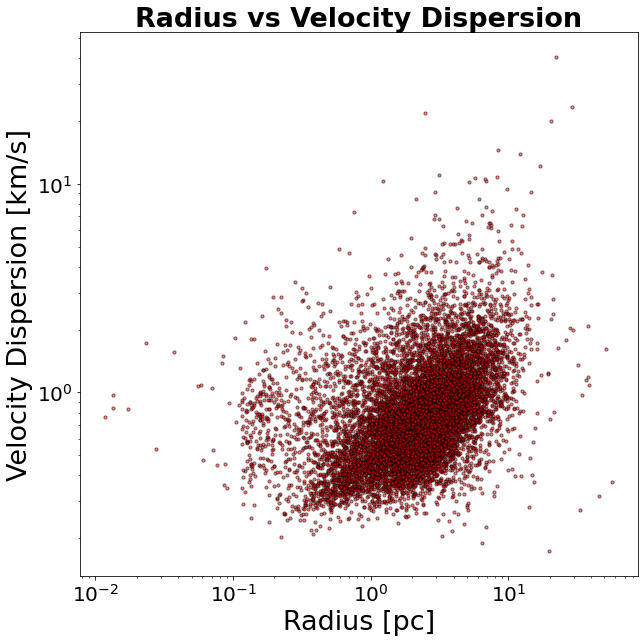

In [69]:
# Plot just the radius (x-axis) and velocity dispersion (y-axis) for now
# Log-log scale the plot itself (NOT THE DATA) so that it resembles the paper
# Don't forget to properly label axes! UNITS!!
plt.scatter(radius, sigmav, alpha = 0.5, c= 'r', edgecolor = 'k', s = 10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius [pc]')
plt.ylabel('Velocity Dispersion [km/s]')
plt.title('Radius vs Velocity Dispersion');

# EC Q2b (2 pts) Larson's Law and Solomon's Solution

From above, Solomon's solution for Larson's Law is what we are using: 

> $\sigma_{\nu}\approx 0.72 R^{n} $, where $n = 0.5$


In [32]:
# Create a function for Larson's Law, where it accepts the x-data and n (in that order!)
# That will be important for fitting, our next step
def Larsons_Law(r, n):
    """
    Larson's Law (Larson 1981) plus Solomon et al. (1987)'s work: 
    sigma ~= 0.72*r**n
    """
    return 0.72*(r**n)#add your function here

## Fitting Larson's Law to the data

Try fitting Larson's Law to the data yourself using the curve_fit function from scipy.optimize (already in your imports!). The documentation, with an example at the bottom, can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Here's how it can be used:


```
fit_values, covariance_matrix = curve_fit(your_function_name, xdata, ydata)
```
fit_values will contain the best-fit value for the parameters in the function you give it and the covariance matrix can be used to get the error on those values. Check the documentation for how to do this.


In [70]:
# Use curve_fit and your function to fit Larson's Law to the data!
fit_values, covariance_matrix = curve_fit(Larsons_Law, radius.value, sigmav.value)
fit_values

array([0.35721082])

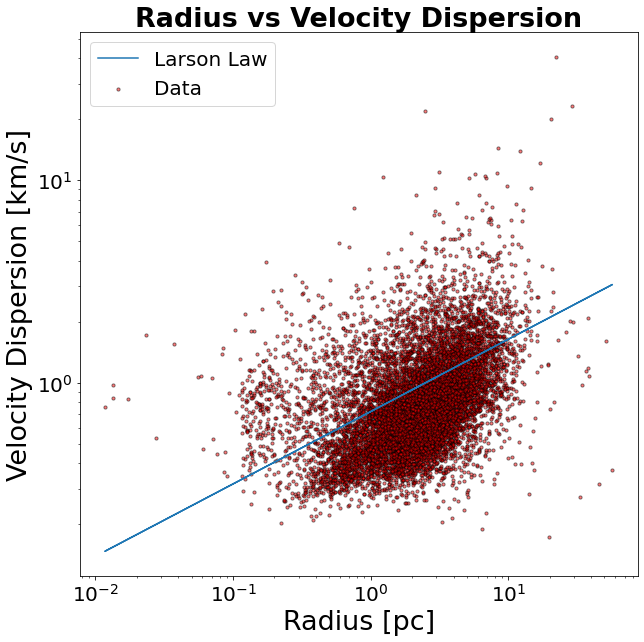

In [71]:
plt.plot(radius.value, Larsons_Law(radius.value, *fit_values), label = 'Larson Law')

plt.scatter(radius, sigmav, alpha = 0.5, c= 'r', edgecolor = 'k', s = 10, label = 'Data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius [pc]')
plt.ylabel('Velocity Dispersion [km/s]')
plt.title('Radius vs Velocity Dispersion')
plt.legend();

## Time to plot 9a: $ \sigma_{\nu} $ v.s. $R_{eq}$ with Larson's Law x2!

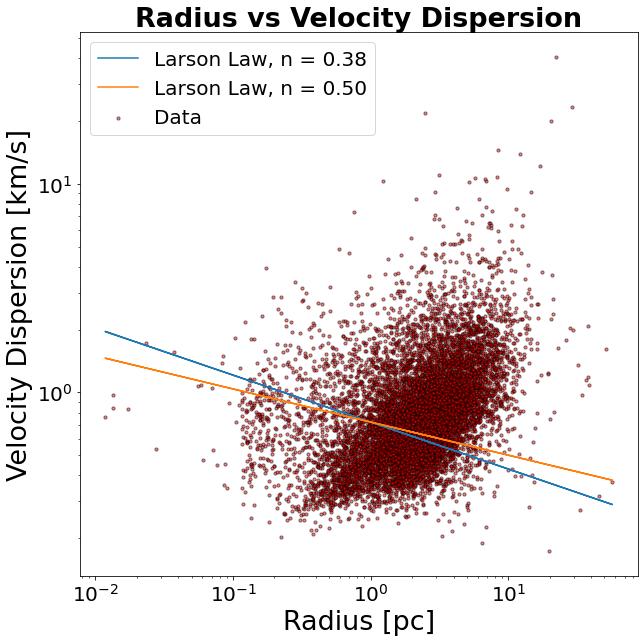

In [67]:
# Time for plotting 9a!
# Plot the data and BOTH Larson's Law with your best fit for n and also Solomon's n
# Annotate/label the plot with the powers that are associated with each line

# Use curve_fit and your function to fit Larson's Law to the data!
fit_values, covariance_matrix = curve_fit(Larsons_Law, radius.value, 0.38)

plt.plot(radius.value, Larsons_Law(radius.value, *fit_values), label = 'Larson Law, n = 0.38')

fit_values, covariance_matrix = curve_fit(Larsons_Law, radius.value, 0.50)

plt.plot(radius.value, Larsons_Law(radius.value, *fit_values), label = 'Larson Law, n = 0.50')

plt.scatter(radius, sigmav, alpha = 0.5, c= 'r', edgecolor = 'k', s = 10, label = 'Data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius [pc]')
plt.ylabel('Velocity Dispersion [km/s]')
plt.title('Radius vs Velocity Dispersion')
plt.legend();

**Question: what did you get for your fit n and is it close to Solomon's n=0.5 or Larson's original n=0.38? Why do you think that is?**

Answer: 

Not 100% sure. There is something strange going on with the slope here.

# EC Q2c (1 pt): Plotting Figure 9b

Figure 9b plots a scaled relation of the data from the previous plot in a way that summarizes three important interpretations of molecular cloud features found by Larson (1981):

1) Molecular clouds are turbulent structures

2) The mass surface density does not significantly vary among molecular clouds

3) An equipartition between gravitional and kinetic energy density exists for molecular clouds

These three relationships mutually depend on and imply each other. Larson successfully combined these ideas into a single expression given by Eqn 2 in our paper:


> $\sigma_{\nu} = (\pi G/5)^{1/2}R^{1/2}_{MC}\Sigma^{1/2}_{MC}$ (EQN 2)

Where $R_{MC}$ is the radius of the cloud and $\Sigma_{MC}$ is the mass surface density.

For this next part, we will walk through plotting the Larson scaling relation with the data provided.





In [65]:
#To recreate Figure 9b, we want to plot the velocity dispersion (y-axis) in units of km/s
#against the product of the cloud radius and mass surface density (x-axis) in units of M_sun/pc
#PAY ATTENTION TO YOUR UNITS WHEN CALCULATING THE VELOCITY DISPERSION!

#First, let's define the scaling function
#We filled this in to help save you time with unit conversions. You're welcome!
#But please double-check that your returned velocity dispersion is in units of km/s!
def Larsons_scaling(x,y,n):
    G = 4.54e-30 #pc^3/M_sun*s^2
    const = (np.pi*G/5)**0.5 #The constant from Eqn 2
    sig = const* ((x**n) * (y**n)) #returns in pc/s 
    return sig * 3.086e13 #converts to km/s    

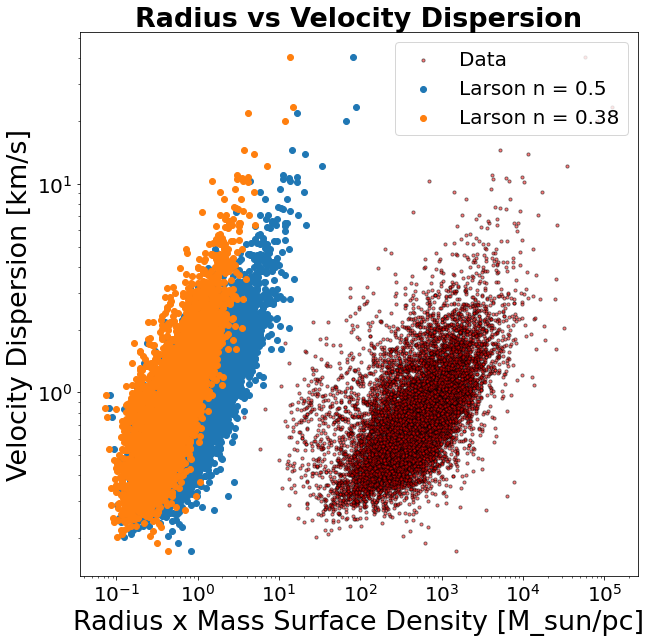

In [80]:
#Now plot the data
#We want velocity dispersion (y-axis) in units of km/s
#and the product of radius and mass surface density (x-axis) in units of M_sun/pc
#Plot the Larson scaling relation on top of the data!
mass=t['Mass'].value
#has to do mass/radius for the units to make sense though?
#Very confused about what exactly you want plotted here.
plt.scatter(mass/radius, sigmav, alpha = 0.5, c= 'r', edgecolor = 'k', s = 10, label = 'Data')
sig = Larsons_scaling(mass/radius, sigmav, n = 0.5)
plt.scatter(sig, sigmav, label = 'Larson n = 0.5')
sig = Larsons_scaling(mass/radius, sigmav, n = 0.38)
plt.scatter(sig, sigmav, label = 'Larson n = 0.38')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius x Mass Surface Density [M_sun/pc]')
plt.ylabel('Velocity Dispersion [km/s]')
plt.title('Radius vs Velocity Dispersion')
plt.legend();

**Wow, what a nice plot!**

# EC Q2d (1 pt): The Virial Parameter

Now let's take a look at another component of Figure 9b: the "virial parameter", which can be defined as the ratio of the virial mass over the measured mass of the cloud:


> $\alpha_{vir} = M_{vir}/M_{MC} $

The virial parameter is a ratio of the cloud's kinetic and potential energy. An $\alpha_{vir} \sim 1$ implies that the cloud is gravitationally bound and in equilibirum. Where objects with an $\alpha_{vir} >> 1$ are not gravitationally bound. 
\
\
Objects with large virial parameters have high velocity dispersions and must either be held together by external pressure or are short-lived compared to their dynamical timescales.
\
\
\
Figure 9b in the paper plots the loci of some different virial parameters with the scaling relation (the dashed lines). However, we will instead pull out the virial parameter from the data provided and examine it a little more up close.





In [82]:
#Let's plot the virial parameter against the mass of the clouds in our dataset

#First, pull the necessary columns from the data table 
alpha_vir = t['alpha_vir'].value
Mass = t['Mass'].value #in Solar Masses

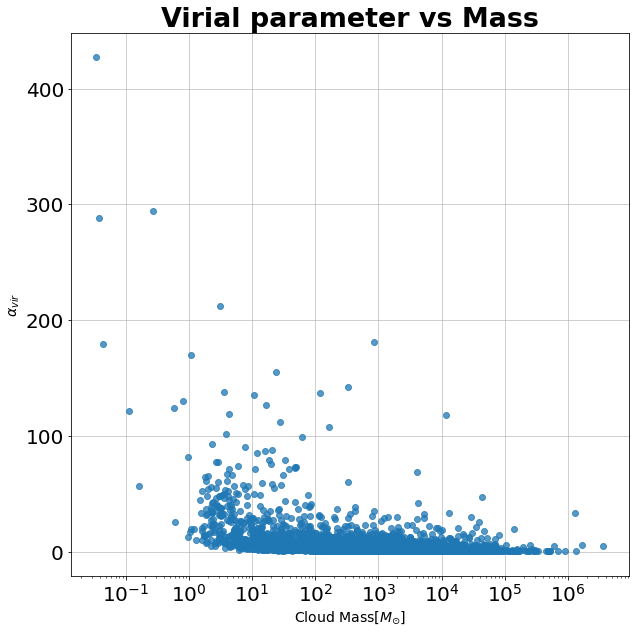

In [83]:
#Plot the absolute value of the virial parameter for the clouds (y-axis) against the mass (x-axis)
#Make sure to label your axes correctly!
fig = plt.figure()
ax = plt.gca()
plt.grid(alpha = 0.75)
ax.scatter(Mass, np.abs(alpha_vir), alpha=0.75, label='data')

plt.title('Virial parameter vs Mass')
ax.set_xlabel(r"Cloud Mass$[M_{\odot}]$", fontsize=14)
ax.set_ylabel(r"$\alpha_{vir}$", fontsize=14)
ax.set_xscale('log')
ax.set_axisbelow(True)

##**Virial Parameter Questions**

**i)  Around what value of $\alpha_{vir}$ do most clouds lie? What does this virial parameter value imply physically?**

Answer:

<100

**ii) What size of clouds have very large $\alpha_{vir}$? What do you think could be the reason for these clouds to have a large $\alpha_{vir}$? What does it mean to have a large virial paramter value?**

Answer:

These are the smaller clouds.

# Question 3 (12 pts) - 6720 and honors only. Written only.